In [29]:
import boto3
from dotenv import load_dotenv
import os  
import pandas as pd
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
from pycaret.regression import (
    setup, 
    compare_models, 
    create_model, 
    plot_model, 
    finalize_model, 
    save_model, 
    load_model, 
    predict_model,
)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

In [31]:
import itables.options as opt
opt.allow_html = True

## Wczytujemy DataFrame

In [32]:
load_dotenv()

s3 = boto3.client("s3",)

BUCKET_NAME = "pracadomowamodul9"

In [33]:
df = pd.read_csv(f"s3://{BUCKET_NAME}/processed/df.csv")

In [34]:
df.head()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Płeć               18137 non-null  object 
 1   Kategoria wiekowa  18137 non-null  object 
 2   5 km Czas          18137 non-null  float64
 3   5 km Tempo         18137 non-null  float64
 4   10 km Czas         18137 non-null  float64
 5   10 km Tempo        18137 non-null  float64
 6   15 km Czas         18137 non-null  float64
 7   15 km Tempo        18137 non-null  float64
 8   20 km Czas         18137 non-null  float64
 9   20 km Tempo        18137 non-null  float64
 10  Tempo Stabilność   18137 non-null  float64
 11  Czas               18137 non-null  float64
 12  Tempo              18137 non-null  float64
dtypes: float64(11), object(2)
memory usage: 1.8+ MB


## Podstawowy eksperyment

In [41]:
raw_exp = setup(
    data=df,
    target='Czas',
    verbose=False,
    session_id=123,
    categorical_features=['Płeć', 'Kategoria wiekowa'],
    numeric_features=['5 km Czas', '5 km Tempo', '10 km Czas', '10 km Tempo', '15 km Czas', '15 km Tempo', '20 km Czas', '20 km Tempo'],
    ignore_features=['Tempo Stabilność', 'Tempo'],
)

In [42]:
raw_exp.dataset.head()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [43]:
raw_exp.dataset_transformed.head()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [44]:
best_exp = raw_exp.compare_models()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


## Normalizacja danych i porównanie modeli regresyjnych

In [45]:
normalized_exp = setup(
    data=df,
    target='Czas',
    verbose=True,
    normalize=True,
    normalize_method='zscore',
    session_id=123,
    categorical_features=['Płeć', 'Kategoria wiekowa'],
    numeric_features=['5 km Czas', '5 km Tempo'],
    ignore_features=['10 km Czas', '10 km Tempo', '15 km Czas', '15 km Tempo', '20 km Czas', '20 km Tempo', 'Tempo Stabilność', 'Tempo'],
)

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


## Wybieramy najlepsze 5 modele 

In [46]:
best_models = normalized_exp.compare_models(
    sort='MAE', 
    n_select=5, 
    fold=10,
    exclude=['dummy']
)

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


## Wybieramy najlepsze tuniengowe modele

In [47]:
tuned_best_models = [normalized_exp.tune_model(m, n_iter=50, optimize="MAE") for m in best_models]

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


Fitting 10 folds for each of 8 candidates, totalling 80 fits


Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


## Wybieramy najlepszy model

In [48]:
best_model = normalized_exp.compare_models(best_models + tuned_best_models, sort="MAE")

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [50]:
normalized_exp.predict_model(best_model)

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


## Wizualizacja metryk

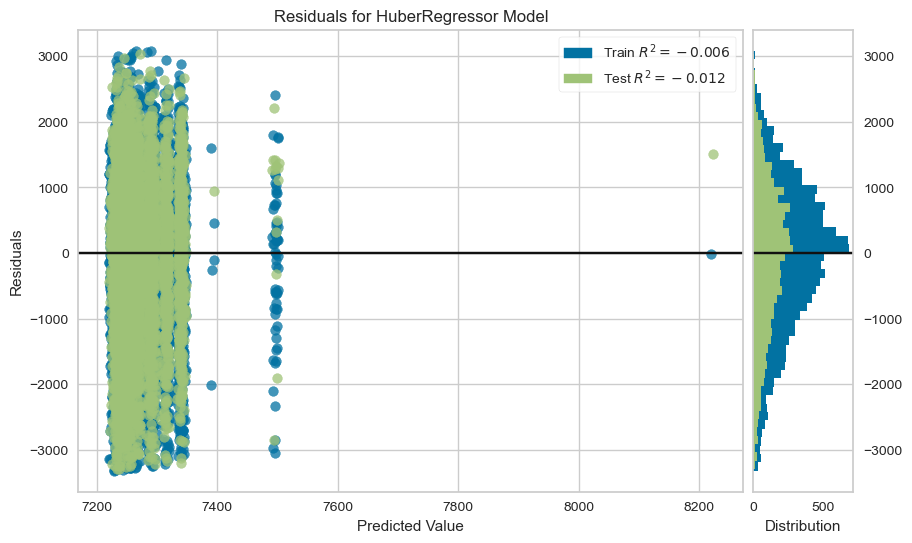

In [51]:
normalized_exp.plot_model(best_model, plot='residuals')

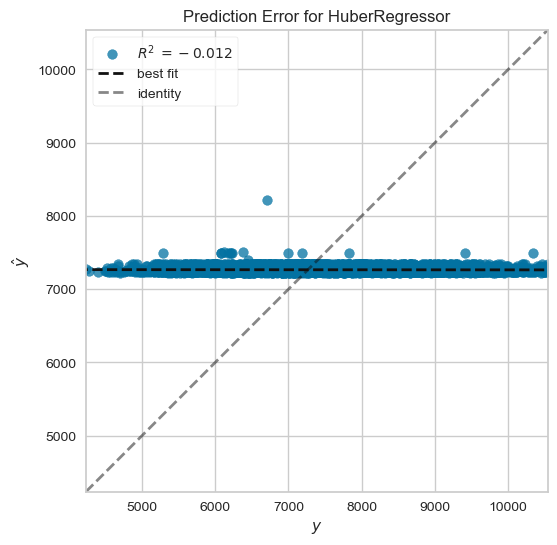

In [52]:
normalized_exp.plot_model(best_model, plot='error')

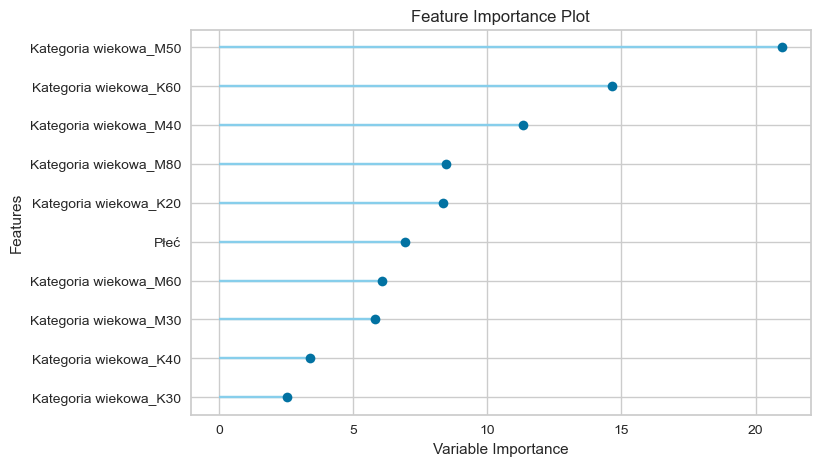

In [21]:
normalized_exp.plot_model(best_model, plot='feature')

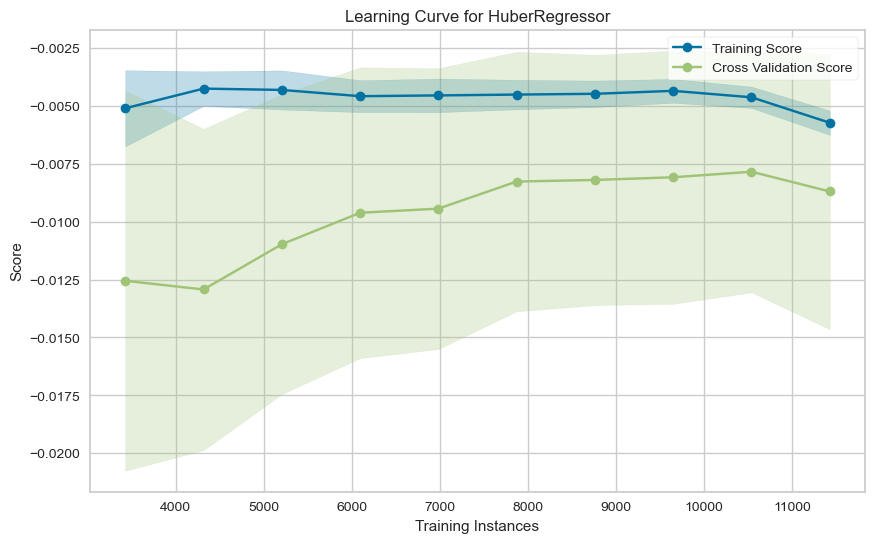

In [22]:
normalized_exp.plot_model(best_model, plot='learning')

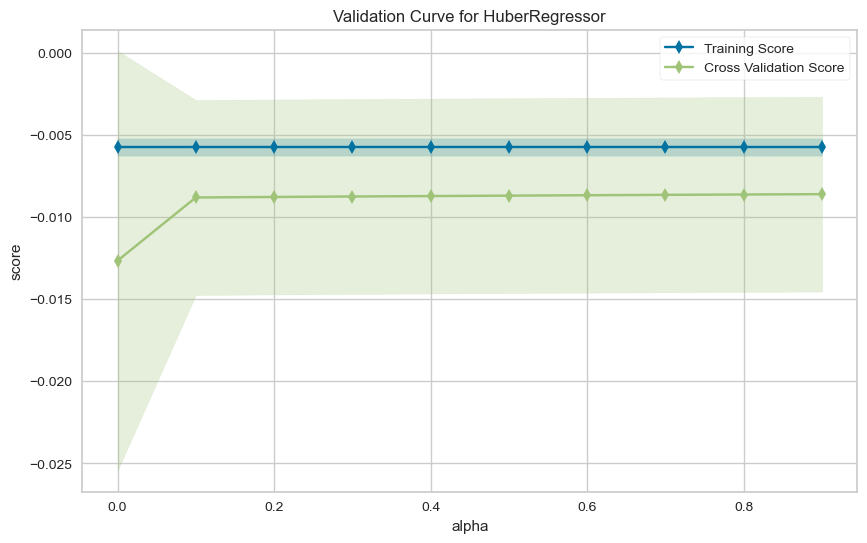

In [23]:
normalized_exp.plot_model(best_model, plot='vc')

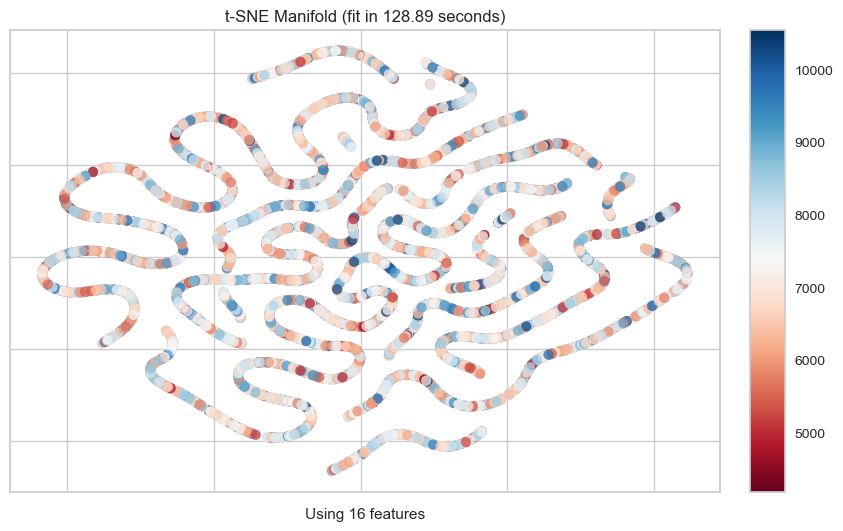

In [24]:
normalized_exp.plot_model(best_model, plot='manifold')

## Finalizacja i zapis najlepszego modelu do Gloal Ocaen Spaces

In [25]:
best_final_model = normalized_exp.finalize_model(best_model)
best_final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['5 km Czas', '5 km Tempo'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Płeć', 'Kategoria wiekowa'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Płeć'],
                                    transformer=Ordi...
                ('onehot_encoding',
                 TransformerWrapper(include=['Kategoria wiekowa'],
                                    transformer=OneHotEncoder(cols=['Kategoria '
                                                                    'wiekowa'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator', HuberRegressor(alpha=0.5, epsilon=1.1))])

In [26]:
normalized_exp.save_model(best_final_model, "best_model", verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['5 km Czas', '5 km Tempo'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Płeć', 'Kategoria wiekowa'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Płeć'],
                                     transformer=Ordi...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Kategoria wiekowa'],
                                     transformer=OneHotEncoder(cols=['Kategoria '
                                                                     'wiekowa'],
                                                               handle_missing='return_nan',
                                                            

In [27]:
base_path = '/Users/borysenkoruslan/Desktop/od_zera_do_ai/modul_9/praca_domowa_modul_9'

files = [
    'best_model.pkl',
]

for file in files:
    local_file_path = os.path.join(base_path, file)
    remote_file_path = f'processed/{file}'
    
    try:
        s3.upload_file(local_file_path, BUCKET_NAME, remote_file_path)
        print(f'✓ UPLOADED: {file} → {remote_file_path}')
    except Exception as e:
        print(f'✗ LOADING FAULT {file}: {e}')

✓ UPLOADED: best_model.pkl → processed/best_model.pkl
